# Quadruple Line Junctions

Objective: Calculate the misorientation angle at the quadruple line junction of deformation twinning in 10M Ni-Mn-Ga

### Import packages

In [1]:
## numpy: package for cumputing numerical arrays
from numpy.linalg import inv #inverse of a matrix
import numpy as np
np.set_printoptions(precision=4) #precision of arrays

## matplotlib: package for plotting
from matplotlib import pyplot as plt
%matplotlib inline

## import functions from twinning
from twinning import *

### 10M Ni-Mn-Ga

1. Lattice parameters
2. Irrational element of NC twins

In [2]:
## lattice parameters
a,b,c,gamma = [0.5972, 0.5944, 0.5584, np.deg2rad(90.37)] #NMG lattice parameter: Seiner et al. (2019)
#a,b,c,gamma = [1., 0.97, 0.94, np.deg2rad(94)] #Exaggerated lattice

## irrational element of NC twins
q3 = (2*a*b*np.cos(gamma) - np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)
q4 = (2*a*b*np.cos(gamma) + np.sqrt(a**4 + b**4 + 2*a**2*b**2*np.cos(2*gamma)))/(a**2 - b**2)

### Transformation Relation

#### $V_1$

Crystal Coordinate Frame ($V_1$) $\leftrightarrow$ Reference Frame ($R$)

In [5]:
## Transformation: R ↔ V₁
rPv1 = np.array([[1,b/a*np.cos(gamma),0],[0,-b/a*np.sin(gamma),0],[0,0,-c/a]])

$V_1$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 1.     -0.0064  0.    ]
 [ 0.     -0.9953  0.    ]
 [ 0.      0.     -0.935 ]]


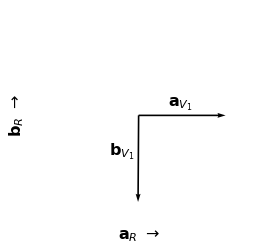

In [6]:
print(rPv1)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv1)

ax.text(+0.015,+0.005,r'$\mathbf{a}_{V_1}$',fontsize=16) #label vector a
ax.text(-0.015,-0.02,r'$\mathbf{b}_{V_1}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 q_3 0)_{V_1}$ & $(1 1 0)_{V_1}$

In [8]:
## Angle between (1 q3 0) and (110) pair
alpha1 = 180 - angleTBpair(rPv1,[1,q3,0],[1,1,0])
print('angle between (1 q3 0) and (110) pair: %.4f degrees' % alpha1)

angle between (1 q3 0) and (110) pair: 117.3403 degrees


#### $V_3$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_1 \to V_3$          |  $(1 1 0)_m$  | $\boldsymbol{m}_{(110)_m}$ |

In [11]:
## Orientation Relationship   rL: V₁ → V₃

#(1 1 0) compound twin
rL_v1tov3 = rotationmatrix([1,1,0] @ inv(rPv1), np.pi)

#Transformation relation: R ↔ V₃
rPv3 = rL_v1tov3 @ rPv1; del rL_v1tov3
#print(rPv2); print()

$V_3$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[-0.0111  0.9953  0.    ]
 [-0.9999 -0.0046  0.    ]
 [ 0.      0.      0.935 ]]


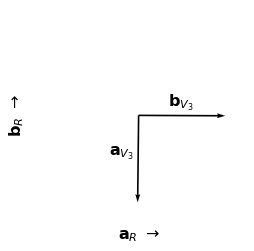

In [12]:
print(rPv3)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv3)

ax.text(-0.015,-0.02,r'$\mathbf{a}_{V_3}$',fontsize=16) #label vector a
ax.text(+0.015,+0.005,r'$\mathbf{b}_{V_3}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(\bar{1} \bar{q_4} 0)_{V_3}$ & $(1 1 0)_{V_3}$

In [44]:
## Angle between (-1 -q4 0) and (1 0 0) pair
alpha3 = angleTBpair(rPv3,[-1,-q4,0],[1,1,0])
print('angle between (-1 -q4 0) and (110) pair: %.4f degrees' % alpha3)

angle between (-1 -q4 0) and (110) pair: 26.8827 degrees


#### $V_2$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_3 \to V_2$          |  $(\bar{1} \bar{q_4} 0)_m$  | $\sim \boldsymbol{4}^+_{(001)_m}$ |

In [29]:
## Orientation Relationship   rL: V₃ → V₂

#(-1 -q4 0) NC twin
rL_v3tov2 = OR_NCtwins([-1,-q4,0],[q4,-1,0],rPv3,a)
#rL_v3tov2 = rotationmatrix(rPv3 @ [0,0,1],np.pi/2)

#Transformation relation: R ↔ V₂
rPv2 = rL_v3tov2 @ rPv3; del rL_v3tov2
#print(rPv3); print()

$V_2$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 0.9998  0.0126  0.    ]
 [-0.0191  0.9952  0.    ]
 [ 0.      0.      0.935 ]]


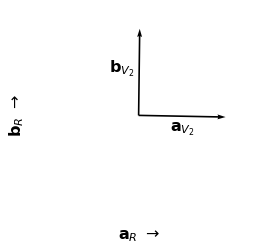

In [42]:
print(rPv2)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv2)

ax.text(+0.016,-0.008,r'$\mathbf{a}_{V_2}$',fontsize=16) #label vector a
ax.text(-0.015,0.022,r'$\mathbf{b}_{V_2}$',fontsize=16) #label vector b

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 q_3 0)_{V_2}$ & $(1 1 0)_{V_2}$

In [45]:
## alpha2: angle between (1 q3 0) and (1 1 0) pair
alpha2 = angleTBpair(rPv2,[1,q3,0],[1,1,0])
print('angle between (1 q3 0) and (110) pair: %.4f degrees' % alpha2)

angle between (1 q3 0) and (110) pair: 62.6597 degrees


#### $V_4$

Orientation relationship

| Variant Transformation | Twin Boundary |  Orientation Relationship  |
| ---------------------: | :-----------: | :------------------------: |
| $V_2 \to V_4$          |  $(1 1 0)_m$  | $\boldsymbol{m}_{(110)_m}$ |

In [46]:
## Orientation Relationship   rL: V₂ → V₄

#(1 1 0) compound twin
rL_v2tov4 = rotationmatrix([1,1,0] @ inv(rPv2), np.pi)

#Transformation relation: R ↔ V₄
rPv4 = rL_v2tov4 @ rPv2; del rL_v2tov4
#print(rPv2); print()

$V_2$ lattice vectors: $\boldsymbol{a}$ and $\boldsymbol{b}$

[[ 0.008   0.9952  0.    ]
 [ 1.     -0.0144  0.    ]
 [ 0.      0.     -0.935 ]]


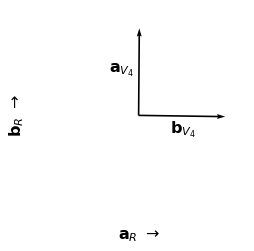

In [58]:
print(rPv4)

## plot lattice vectors a and b
fig, ax = latticevectors_ab(rPv4)

ax.text(+0.016,-0.009,r'$\mathbf{b}_{V_4}$',fontsize=16) #label vector b
ax.text(-0.015,0.022,r'$\mathbf{a}_{V_4}$',fontsize=16) #label vector a

ax.set_xticks([]); ax.set_yticks([]) # remove ticks

plt.show() # show plot
del fig,ax

Angle between TB pair: $(1 q_3 0)_{V_2}$ & $(1 1 0)_{V_2}$

In [55]:
## Angle between (-1 -q4 0) and (1 1 0) pair
alpha4 = 180 - angleTBpair(rPv4,[-1,-q4,0],[1,1,0])
print('angle between (1 q3 0) and (110) pair: %.4f degrees' % alpha4)

angle between (1 q3 0) and (110) pair: 153.1173 degrees


### Sum of angles

In [57]:
sum_of_angles = alpha1+alpha2+alpha3+alpha4
print('sum of angles: %.4f degrees' % sum_of_angles)
print()

disclination_angle = sum_of_angles - 360
print('disclination angle: %.4f degrees' % disclination_angle)

sum of angles: 360.0000 degrees

disclination angle: 0.0000 degrees
